# LeNet 5 Architecture

The LeNet-5 architecture, introduced by Yann LeCun in 1998, is a pioneering convolutional neural network. A variant of LeNet-5 is given below:

MNIST Image (28×28) → C1 (28×28×6) → S2 (14×14×6) → C3 (14×14×16) → S4 (7×7×16) → C5 (120) → F6 (84) → Output (10)

1. Input: 28x28 grayscale image
2. C1: Convolutional layer (6 feature maps, 5x5 kernels)
3. S2: Average pooling layer (2x2)
4. C3: Convolutional layer (16 feature maps, 5x5 kernels)
5. S4: Average pooling layer (2x2)
6. C5: Fully connected layer (120 units)
7. F6: Fully connected layer (84 units)
8. Output: Fully connected layer (10 units)

# Do the following

- **Q2a** Build LeNet-5 Architecture. Note that the activation function is Sigmoid.

- **Q2b** The code provides the parameter count for LeNet-5. Justify the number of parameters through manual calculation of number of parameters.

- **Q2c** Modify the code to use ReLU activation instead of Sigmoid. Which activation function is bettwer: ReLU or Sigmoid? Explain.

- **Q2d** What changes would you make to this architecture to handle CIFAR-10 images?

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from random import randint
import time
# Clear the output and plot updated metrics
from IPython.display import clear_output, display
import torch
from sklearn.metrics import roc_curve, precision_recall_curve, auc, average_precision_score
from TutQ2utils import *

In [2]:
def get_device():
    # Check if CUDA is available
    if torch.cuda.is_available():
        device = torch.device("cuda")
        print("Using CUDA device.")

    # Check if MPS is available (for Apple M-series chips and newer macOS versions)
    elif getattr(torch.backends, 'mps', None) and torch.backends.mps.is_available():
        device = torch.device("mps")
        print("Using MPS device.")
    else:
        # Fallback to CPU if neither CUDA nor MPS is available
        device = torch.device("cpu")
        print("Using CPU.")
    
    return device

# Get the device
device = get_device()
print(device)

Using MPS device.
mps


In [3]:
# DO NOT REMOVE THIS CELL – THIS DOWNLOADS THE MNIST DATASET
# RUN THIS CELL BEFORE YOU RUN THE REST OF THE CELLS BELOW
#Install torchvision
from torchvision import datasets

# This downloads the MNIST datasets ~63MB
mnist_train = datasets.MNIST("./", train=True, download=True)
mnist_test  = datasets.MNIST("./", train=False, download=True)

x_train = mnist_train.data 
y_train = mnist_train.targets
    
x_test = mnist_test.data 
y_test = mnist_test.targets 

# Convert the data to a float type 
x_train_float = x_train.float()
x_test_float = x_test.float()

#Compute mean and std
#Why?
mean = x_train_float.mean()
std = x_train_float.std()

# Make sure all tensors are on the same device to avoid device mismatch errors
mean = mean.to(device)
std = std.to(device)

print(x_train.shape)

torch.Size([60000, 28, 28])


# **Q2a** Build LeNet-5 Architecture. Note that the activation function is Sigmoid.

In [4]:
class LeNet_wiki(nn.Module):
    def __init__(self):

        super(LeNet_wiki, self).__init__()

        # 5 x 5 Conv (6), pad 2            
        self.conv1 = nn.Conv2d(in_channels=1,   out_channels=6,  kernel_size=5,  padding=2 )
        
        # 2 x 2 AvgPool, stride = 2 
        self.pool1  = nn.AvgPool2d(2,2)
        
        # 5 x 5 Conv (16), pad 2 
        self.conv2 = nn.Conv2d(in_channels= 6,  out_channels=16,  kernel_size=5,  padding=2 )
        
        #  2 x 2 AvgPool, stride = 2 
        self.pool2 = nn.AvgPool2d(2,2)
        
        # FC1: 120
        self.linear1 = nn.Linear(784, 120)
        
        # FC2: 84
        self.linear2 = nn.Linear(120,84)

        # FC2: 10
        self.linear3 = nn.Linear(84,10)

        #Activation
        self.activation = nn.Sigmoid()


    def forward(self, x):

        #Conv1
        x = self.conv1(x)
        x = self.activation(x)
        
        # AvgPool1
        x = self.pool1(x)
        
        #Conv2
        x = self.conv2(x)
        x = self.activation(x)
        
        #AvgPool2
        x = self.pool2(x)

        # Linear 1
        x = torch.flatten(x, start_dim=1)
        x = self.linear1(x)
        x = self.activation(x)
        
        # Linear 2
        x = self.linear2(x)
        x = self.activation(x)

        # Linear 3
        x = self.linear3(x)
        #x = self.activation(x)
        
        return x

# Instantiate a LeNet model

In [5]:
#LeNet=LeNet5_convnet()
LeNet = LeNet_wiki()
LeNet = LeNet.to(device)
print(LeNet)


LeNet_wiki(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (linear1): Linear(in_features=784, out_features=120, bias=True)
  (linear2): Linear(in_features=120, out_features=84, bias=True)
  (linear3): Linear(in_features=84, out_features=10, bias=True)
  (activation): Sigmoid()
)


# Count the number of parameters

In [6]:
lenet5_parameter_count = 0
for param in LeNet.parameters():
    lenet5_parameter_count += param.numel()
print(f'There are {lenet5_parameter_count} parameters in this neural network')

There are 107786 parameters in this neural network


# Select Loss function, learning rate and batch size

In [7]:
criterion = nn.CrossEntropyLoss()
initial_lr= 0.25 
btach_size= 128

# ROC curves for untrained model

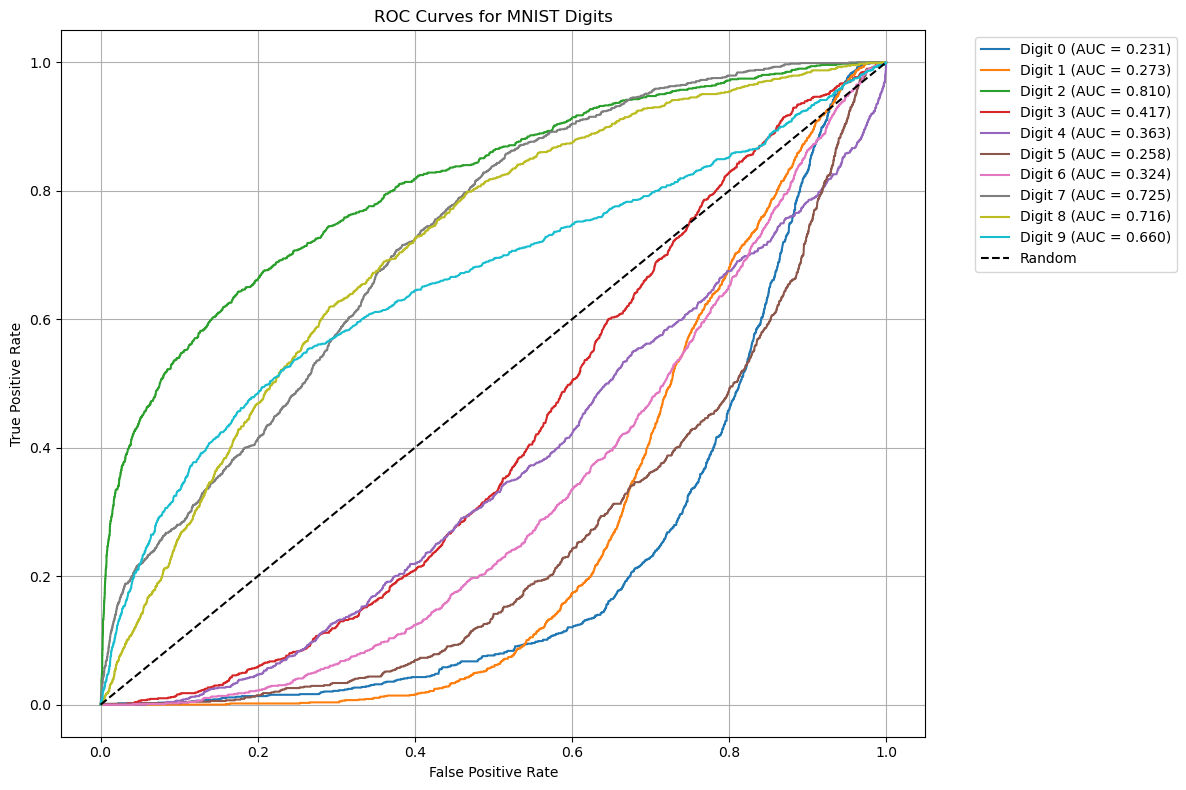


AUC Scores for each digit:
Digit 0: 0.2307
Digit 1: 0.2730
Digit 2: 0.8104
Digit 3: 0.4170
Digit 4: 0.3633
Digit 5: 0.2578
Digit 6: 0.3244
Digit 7: 0.7246
Digit 8: 0.7156
Digit 9: 0.6599

Average AUC across all digits: 0.4777


In [8]:
# First, ensure mean and std are on CPU
mean = mean.cpu()
std = std.cpu()

# Now normalize the data
x_test_float = x_test.float()
x_test_normalized = (x_test_float - mean) / std

auc_scores = calculate_roc_curves_test(model=LeNet, x_test=x_test, y_test=y_test, num_classes=10, device=device, mean=mean, std=std)

In [9]:
class TrainingMetrics:
    def __init__(self):
        self.train_losses = []
        self.train_errors = []
        self.test_errors = []
        self.mean_aucs = []
        self.mean_aps = []
        self.start_time = time.time()

    def update(self, train_loss = None, train_error = None, mean_auc=None, mean_ap=None, test_error=None):
        self.train_losses.append(train_loss)
        self.train_errors.append(train_error)
        if mean_auc is not None:
            self.mean_aucs.append(mean_auc)
        if mean_ap is not None:
            self.mean_aps.append(mean_ap)
        if test_error is not None:
            self.test_errors.append(test_error)

In [10]:
def train_epoch(model, optimizer, x_train, y_train, criterion, device, mean, std, batch_size):
    """
    Train for one epoch
    """
    model.train()
    # running_loss stores the accumulated training loss in an epoch
    running_loss = 0
    # running_error stores the accumulated training error in an epoch
    running_train_error = 0
    # number of batches
    num_batches = 0
    
    #batch 
    shuffled_indices = torch.randperm(len(x_train))
    
    for count in range(0, len(x_train), batch_size):
        #initialize the gradients to zero (to prevent accumulation of gradients)
        optimizer.zero_grad()
        
        #select a minibatch
        indices = shuffled_indices[count:count + batch_size]
        minibatch_data = x_train[indices].unsqueeze(dim=1)
        minibatch_label = y_train[indices]
        
        #Transfer the data to the device 
        minibatch_data = minibatch_data.float().to(device)
        minibatch_label = minibatch_label.to(device)
        
        #Normalize the input data
        #mean and std are the mean and standard deviation of the dataset
        inputs = (minibatch_data - mean) / std
        inputs = inputs.to(device)
        inputs.requires_grad_()
        
        #scores represent the output of FC layer
        # note the absence of SoftMax layer (data is normalized prior to the calculation of loss)        
        scores = model(inputs)

        #Calculation of loss
        loss = criterion(scores, minibatch_label)

        #Calculation of gradients with respect to weihghts
        loss.backward()

        #Updating the weights
        optimizer.step()
        
        #Accumulating loss and erorr rate
        running_loss += loss.detach().item()
        error = error_rate(scores.detach(), minibatch_label)
        running_train_error += error.item()

        #updating the bacth count
        num_batches += 1
    
    train_loss = running_loss / num_batches
    train_error = running_train_error / num_batches
    
    return train_loss, train_error

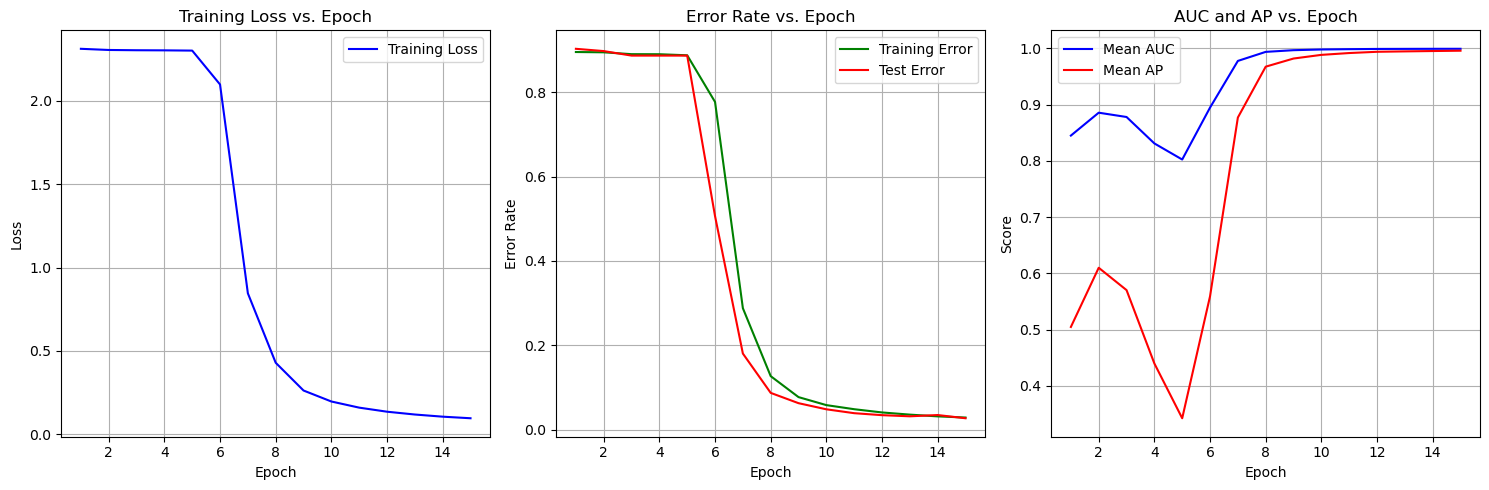

In [11]:
def train_model(model, x_train, y_train, x_test, y_test, num_epochs, batch_size, initial_lr, device, mean, std):
    """
    Main training loop
    """
    metrics = TrainingMetrics()
    criterion = nn.CrossEntropyLoss()    
    # Initialize dynamic plots
    metrics_plotter = DynamicMetricsPlot()
   
    for epoch in range(1, num_epochs + 1):

        # select the optimizer and initialize the learning rate with initial_lr     
        optimizer = torch.optim.SGD(model.parameters(), lr=initial_lr)
        # update the learning rate
        current_lr = learning_rate_scheduler(optimizer, epoch, initial_lr)
        
        # Train for one epoch
        train_loss, train_error = train_epoch(model, optimizer, x_train, y_train, criterion, device, mean, std, batch_size)
        
        # Calculate ROC and PR curves on test set 
        if epoch % 1 == 0:  
            epoch_metrics = calculate_metrics(model, x_test, y_test, num_classes=10,device=device, mean=mean, std=std)
            mean_auc = epoch_metrics['mean_auc']
            mean_ap = epoch_metrics['mean_ap']
            test_error = epoch_metrics['test_error']
            #print(test_error)
        else:
            mean_auc = mean_ap = None

        # Update metrics
        metrics.update(train_loss = train_loss, train_error = train_error, mean_auc = mean_auc, mean_ap = mean_ap, test_error = test_error)
        
        # Print statistics
        elapsed_time = (time.time() - metrics.start_time) / 60        
        print_epoch_stats(epoch, elapsed_time, current_lr, train_loss, train_error, test_error, mean_auc, mean_ap)
        
        metrics_plotter.update(metrics)
    
    return metrics

# Usage
initial_lr = 0.1
num_epochs = 15
batch_size = 32

#metrics = TrainingMetrics()

metrics = train_model(
    model=LeNet,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    num_epochs=num_epochs,
    batch_size=batch_size,
    initial_lr=initial_lr,
    device=device,
    mean=mean,
    std=std
)

# Final plot
#plot_learning_curves(metrics)

<Figure size 640x480 with 0 Axes>

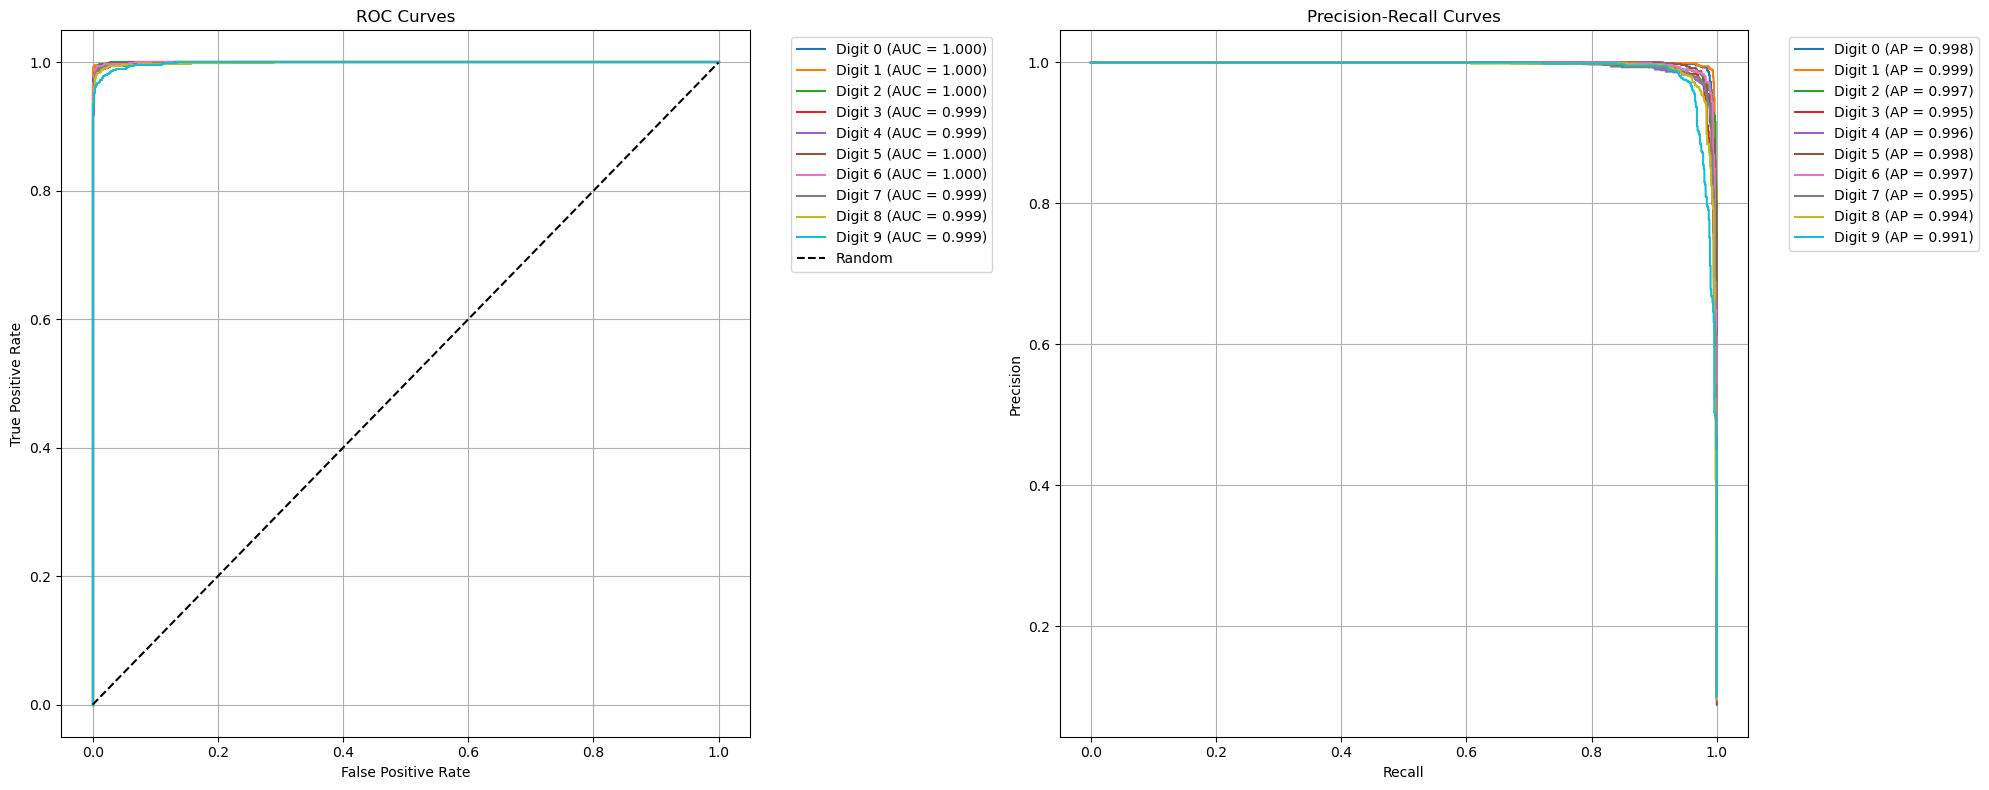


Scores for each digit:
Digit 0: AUC = 0.9996, AP = 0.9980
Digit 1: AUC = 0.9999, AP = 0.9991
Digit 2: AUC = 0.9997, AP = 0.9974
Digit 3: AUC = 0.9993, AP = 0.9952
Digit 4: AUC = 0.9995, AP = 0.9959
Digit 5: AUC = 0.9997, AP = 0.9977
Digit 6: AUC = 0.9996, AP = 0.9973
Digit 7: AUC = 0.9992, AP = 0.9949
Digit 8: AUC = 0.9989, AP = 0.9938
Digit 9: AUC = 0.9986, AP = 0.9909

Mean AUC: 0.9994
Mean AP: 0.9960


In [12]:
# Calculate and plot both ROC and PR curves
auc_scores, ap_scores = plot_roc_pr_curves(model=LeNet,  x_test=x_test, y_test=y_test, num_classes=10, device=device,   mean=mean, std=std)

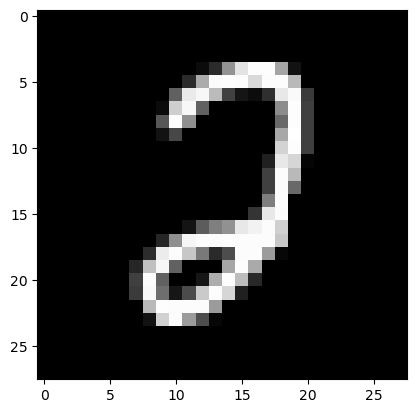

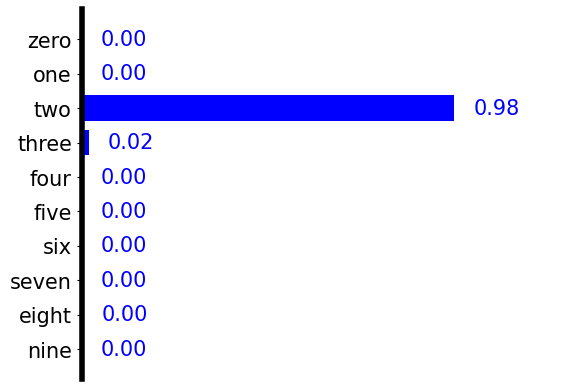

In [13]:
# choose a picture at random
idx=randint(0, 10000-1)
im=x_test[idx]

# Display the picture
plt.imshow(im.numpy(), cmap='gray')
plt.show()
#show(im)

# send to device, rescale, and view as a batch of 1 
im = im.float().to(device)
#im= (im-mean) / std
im=im.view(1,28,28).unsqueeze(dim=1)

# feed it to the net and display the confidence scores
scores =  LeNet(im) 
probs= torch.softmax(scores, dim=1)
show_prob_mnist(probs.cpu())

In [14]:
print(idx)

3415


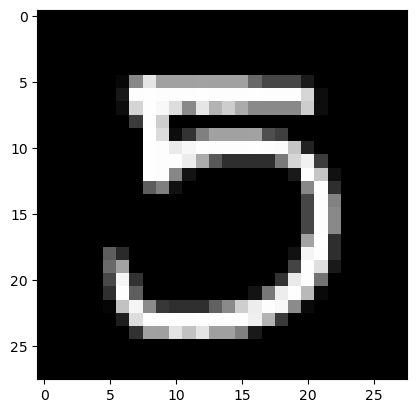

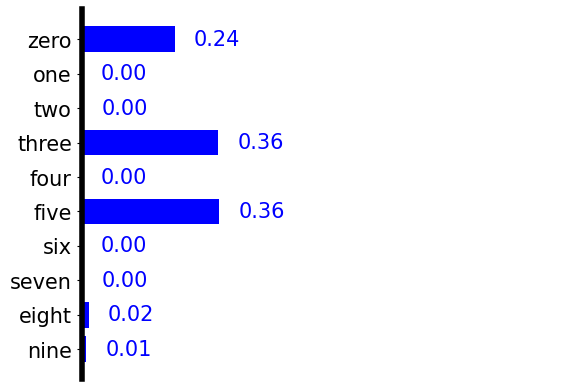

In [15]:
idx = 1466  # model fails
im=x_test[idx]

# Display the picture
plt.imshow(im.numpy(), cmap='gray')
plt.show()
#show(im)

# send to device, rescale, and view as a batch of 1 
im = im.float().to(device)
#im= (im-mean) / std
im=im.view(1,28,28).unsqueeze(dim=1)

# feed it to the net and display the confidence scores
scores =  LeNet(im) 
probs= torch.softmax(scores, dim=1)
show_prob_mnist(probs.cpu())

# **Q2b** The code provides the parameter count for LeNet-5. Justify the number of parameters through manual calculation of number of parameters.

## Parameter Calculations for LeNet_wiki Model

### Layer-wise Parameter Count

| Layer       | Weights | Biases | Total Parameters |
|-------------|---------|--------|------------------|
| Conv1       | 150     | 6      | 156              |
| Conv2       | 2,400   | 16     | 2,416            |
| Linear1     | 94,080  | 120    | 94,200           |
| Linear2     | 10,080  | 84     | 10,164           |
| Linear3     | 840     | 10     | 850              |
| **Total**   |         |        | **107,786**      |


1. **Conv1 Layer**:
   - **Weights**: $6 \times 1 \times 5 \times 5 = 150$
   - **Biases**: 6
   - **Total Parameters**: $150 + 6 = 156$

2. **Conv2 Layer**:
   - **Weights**: $16 \times 6 \times 5 \times 5 = 2,400$
   - **Biases**: 16
   - **Total Parameters**: $2,400 + 16 = 2,416$

3. **Linear1 Layer**:
   - The feature map size after pooling is 7x7, flattening results in $16 \times 7 \times 7 = 784$
   - **Weights**: $784 \times 120 = 94,080$
   - **Biases**: 120
   - **Total Parameters**: $94,080 + 120 = 94,200$

4. **Linear2 Layer**:
   - **Weights**: $120 \times 84 = 10,080$
   - **Biases**: 84
   - **Total Parameters**: $10,080 + 84 = 10,164$

5. **Linear3 Layer**:
   - **Weights**: $84 \times 10 = 840$
   - **Biases**: 10
   - **Total Parameters**: $840 + 10 = 850$

### Total Parameters

The total number of trainable parameters in the LeNet_wiki model is $107,786$.

# **Q2c** Modify the code to use ReLU activation instead of Sigmoid. Which activation function is better: ReLU or Sigmoid? Explain.



# **Q2d** What changes would you make to this architecture to handle CIFAR-10 images?

In [ ]:
class LeNet_CIFAR10(nn.Module):
    def __init__(self):
        super(LeNet_CIFAR10, self).__init__()

        # Adjusted for 3 input channels (RGB)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, padding=2)
        
        # 2 x 2 AvgPool, stride=2
        self.pool1 = nn.AvgPool2d(2, 2)
        
        # Second Conv Layer
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, padding=2)
        
        # 2 x 2 AvgPool, stride=2
        self.pool2 = nn.AvgPool2d(2, 2)
        
        # Calculate the feature map size after pooling: 16 x 8 x 8
        # Fully connected layers adjusted accordingly
        self.linear1 = nn.Linear(16 * 8 * 8, 120)
        self.linear2 = nn.Linear(120, 84)
        self.linear3 = nn.Linear(84, 10)

        # Activation
        self.activation = nn.Sigmoid()

    def forward(self, x):
        # Conv1
        x = self.conv1(x)
        x = self.activation(x)
        
        # AvgPool1
        x = self.pool1(x)
        
        # Conv2
        x = self.conv2(x)
        x = self.activation(x)
        
        # AvgPool2
        x = self.pool2(x)

        # Flattening
        x = torch.flatten(x, start_dim=1)
        
        # Linear1
        x = self.linear1(x)
        x = self.activation(x)
        
        # Linear2
        x = self.linear2(x)
        x = self.activation(x)

        # Linear3
        x = self.linear3(x)
        
        return x